# Ames Housing Data Cleaning and Preprocessing Notebook

The primary goal of this notebook is to ensure that our Ames Housing dataset is ready for modeling. We'll follow these steps:

- Handle missing values.
- Encode categorical variables.
- Create new features based on domain knowledge.
- Scale numerical features for modeling.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_df = pd.read_csv('../data_details/train.csv')
test_df = pd.read_csv('../data_details/test.csv')

After our extensive analysis in the [EDA](./1_data_exploration.ipynb) notebook, we identified several features with missing values. 

We start by examining the missing values and their percentage in both the training and test datasets.



In [2]:
# Function to display missing values
def display_missing_values(df):
    missing_values = df.isnull().mean() * 100
    return missing_values[missing_values > 0].sort_values(ascending=False)

print("Missing values in Training Data:")
print(display_missing_values(train_df))
print("\nMissing values in Test Data:")
print(display_missing_values(test_df))

Missing values in Training Data:
PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Missing values in Test Data:
PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType  

Features like PoolQC, MiscFeature, Alley, Fence, and FireplaceQu are missing more than 45% of their values.

In the context of the housing industry, especially given my experience as a real estate agent, these missing values often indicate the absence of that feature in the house. For instance, a NaN in PoolQC probably means there is no pool. We'll handle these by filling them with "None" for categorical features and 0 for numerical ones.

For features like LotFrontage, which represents the linear feet of street connected to the property, we can use neighborhood-based imputation. 

In real estate and the housing industry, houses in the same neighborhood often have similar lot frontages.

So I decide to impute missing values in LotFrontage with the median LotFrontage of the neighborhood. 

The feature Electrical has just one missing value, and so we can replace it with the mode of the column without introducing much bias.



In [3]:
# Filling missing values for features where NaN means the feature doesn't exist
for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual',
                'MasVnrType']:
    train_df[feature].fillna('None', inplace=True)
    

# Filling missing values for features where NaN means zero
for feature in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
                'BsmtHalfBath', 'MasVnrArea']:
    train_df[feature].fillna(0, inplace=True)
    
    
# Group by neighborhood and fill in missing LotFrontage value by the median LotFrontage of the neighborhood
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# For Electrical, we'll replace it with the most common value
train_df['Electrical'].fillna(train_df['Electrical'].mode()[0], inplace=True)

# Checking if there are any missing values left
print(f"{train_df.isnull().sum().sum()} missing values left.")

0 missing values left.


#### Remove missing values from test set as well



In [4]:
# Filling missing values for features where NaN means the feature doesn't exist
for feature in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual',
                'MasVnrType']:
    test_df[feature].fillna('None', inplace=True)

# Filling missing values for features where NaN means zero
for feature in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
                'BsmtHalfBath', 'MasVnrArea']:
    test_df[feature].fillna(0, inplace=True)
    
# Group by neighborhood and fill in missing LotFrontage value by the median LotFrontage of the neighborhood
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# For Electrical, we'll replace it with the most common value
test_df['Electrical'].fillna(test_df['Electrical'].mode()[0], inplace=True)

# Checking if there are any missing values left
print(f"{test_df.isnull().sum().sum()} missing values left.")

12 missing values left.


In [5]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [6]:
# I'll just fill in with the mode

mode_value = test_df['MSZoning'].mode()[0]
test_df['MSZoning'].fillna(mode_value, inplace=True)

mode_value = test_df['SaleType'].mode()[0]
test_df['SaleType'].fillna(mode_value, inplace=True)

In [7]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

The training dataset has 0 missing values.
The test dataset also has 0 missing values.

Our datasets are now free of missing values, ensuring that our models will be able to process the data without encountering NaN values, which can cause errors or reduce performance.

### Handling Outliers

Outliers can significantly impact the performance of regression models. These are data points that diverge significantly from other observations in the dataset. Given the nature of house pricing, some houses can be exceptionally expensive due to unique characteristics, while others can be significantly cheaper due to various reasons. These extreme values can disproportionately influence our model, making it essential to handle them.

Strategy:

- Visualize potential outliers using scatter plots for key numerical features against the target variable, SalePrice.
- Determine a threshold for outliers and remove them from the training data.

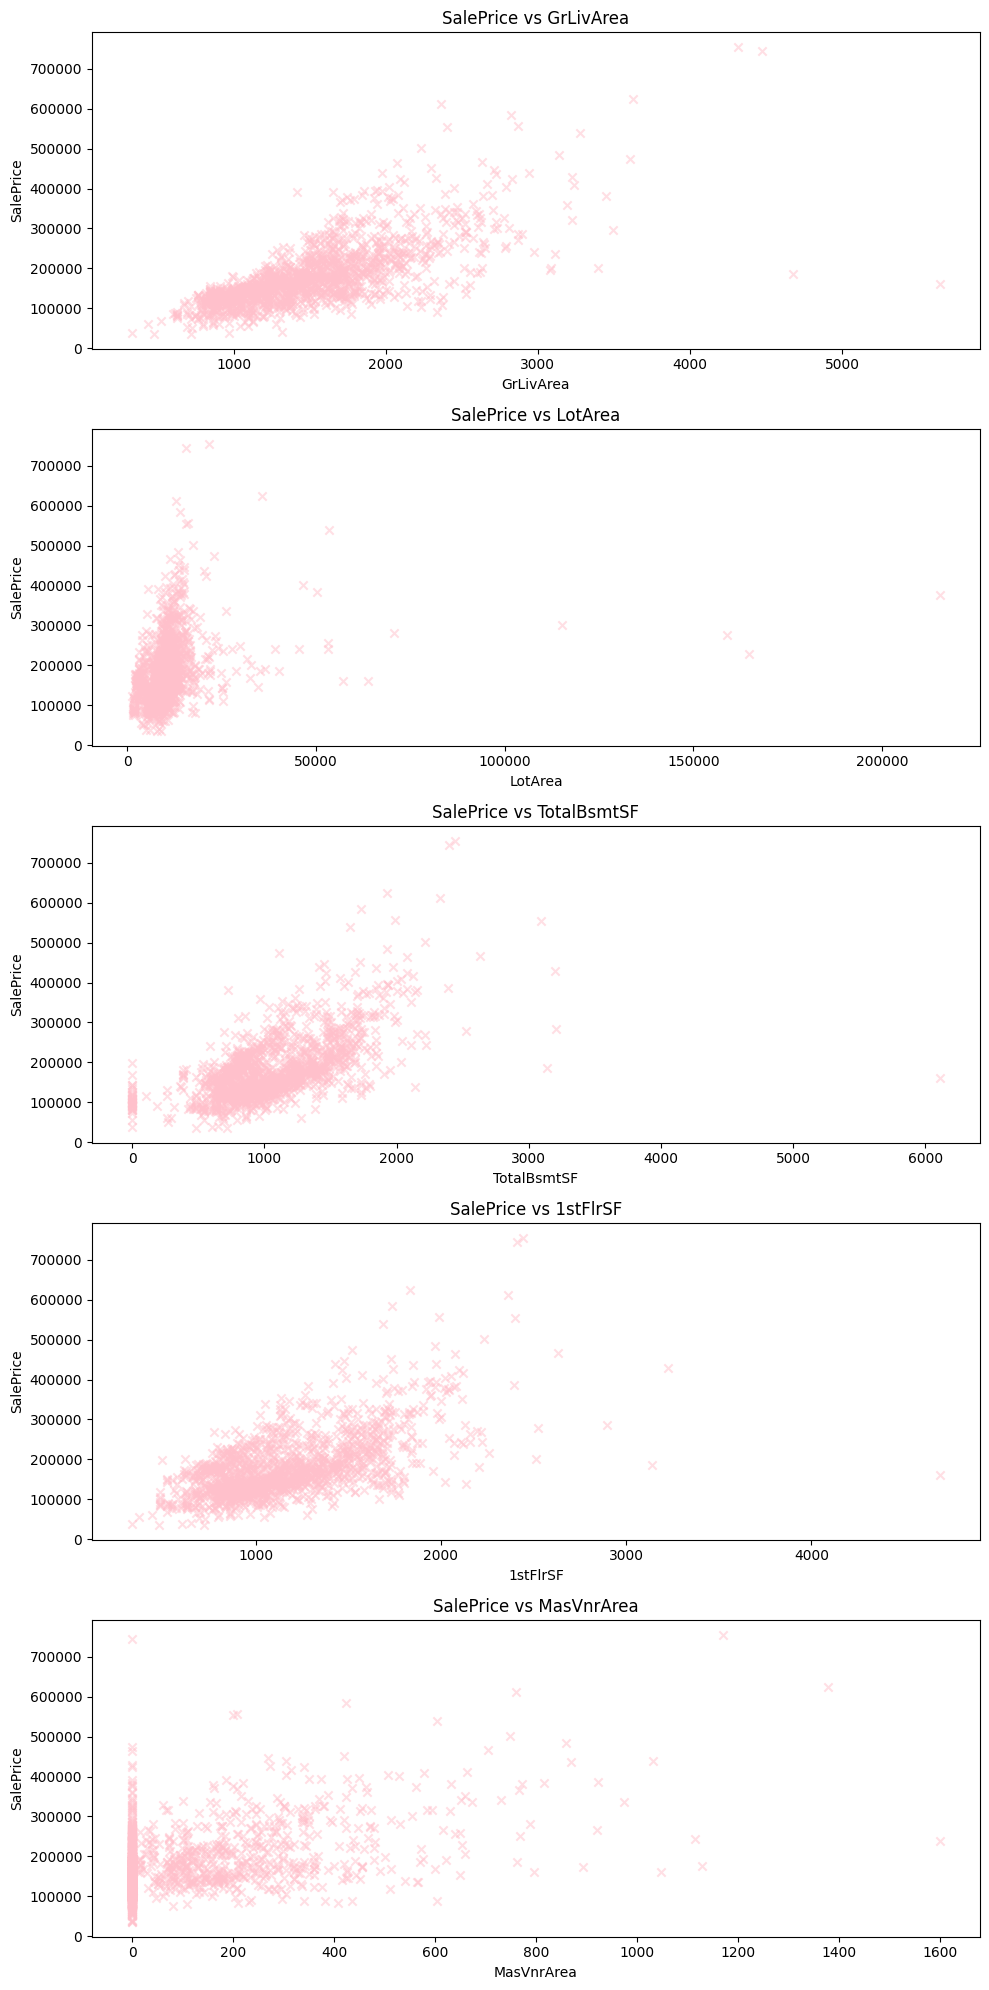

In [8]:

features_to_check = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'MasVnrArea']

fig, axes = plt.subplots(nrows=len(features_to_check), ncols=1, figsize=(10, 20))

for i, feature in enumerate(features_to_check):
    axes[i].scatter(train_df[feature], train_df['SalePrice'], alpha=0.5, color='pink', marker='x')  
    axes[i].set_title(f'SalePrice vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

From the scatter plots, we can make the following observations:

- GrLivArea: There are a few houses with a large living area (GrLivArea) but are priced low. These can be considered outliers.
- LotArea: While most houses have a LotArea under 100,000 sq.ft., a few exceed this and can be treated as outliers.
- TotalBsmtSF: A couple of houses have a large basement area but don't correspondingly have a higher price.
- 1stFlrSF: Similar to TotalBsmtSF, some houses with large first floor areas don't have a higher sale price.
- MasVnrArea: Most of the data points cluster below 1,500 sq.ft., but there are a few exceptions.

### Strategy for Handling Outliers:
Using knowledge from learning about the housing industry:

- For `GrLivArea`, we'll remove houses with more than 4,000 sq.ft. that are priced below $300,000. This is as houses with large living areas, especially above 4,000 square feet, are generally considered luxury homes and are usually priced higher due to their size, amenities, and often their location. From the scatter plot, we observe a couple of homes with a living area greater than 4,000 sq.ft. but priced surprisingly low. These points deviate from the general trend, and indicate potential data errors or unique situations (e.g., a mansion in a very undesirable location or a property with legal issues) - either way, anomalies.


- For `LotArea`, we'll consider houses with more than 100,000 sq.ft. as outliers and remove them. This is because a lot size of over 100,000 sq.ft. (about 2.3 acres) is very large for a residential property, especially in a city as Ames is . Few data points also fall into this range, and they can unduly influence models, especially linear models, due to the high magnitude of the feature.


- For `TotalBsmtSF` and `1stFlrSF`, houses with an area more than 4,000 sq.ft. will be treated as outliers. This is as basements or first floors larger than 4,000 sq.ft. are generally rare in typical residential houses. Such large areas are usually found in commercial properties or extraordinarily luxurious mansions and  the data distribution showed very few homes with such large basements or first floors, suggesting these might be rare occurrences or data anomalies.


- For `MasVnrArea`, any house with an area above 1,500 sq.ft. will be considered an outlier. Masonry veneer is a type of outer layer or covering commonly used in home construction, typically made of materials like brick or stone. While there is no strict rule that the veneer area for residential homes should not exceed 1,500 square feet, larger veneer areas are less common in standard residential construction. Veneer is often used as an exterior decorative accent feature rather than as the primary structural component of a house, usually limited to specific areas such as the front facade or architectural elements. During the analysis of the data, it was observed that most homes had a veneer area below this threshold. However, there were a few data points that showed a larger veneer area, which could indicate unique or non-standard properties. Alternatively, it could also be a result of errors in the data collection process. Nonetheless, these data points are considered anomalies.

In [9]:
# Removing outliers based on the strategies discussed

# For GrLivArea
train_df = train_df.drop(train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index)

# For LotArea
train_df = train_df.drop(train_df[train_df['LotArea'] > 100000].index)

# For TotalBsmtSF and 1stFlrSF
train_df = train_df.drop(train_df[train_df['TotalBsmtSF'] > 4000].index)
train_df = train_df.drop(train_df[train_df['1stFlrSF'] > 4000].index)

# For MasVnrArea
train_df = train_df.drop(train_df[train_df['MasVnrArea'] > 1500].index)

# Checking the shape of the training dataset after removing outliers
train_df.shape


(1453, 81)

After removing the outliers, our training dataset now contains 1,453 instances, down from the initial 1,460. We removed 7 instances considered as outliers based on the criteria we set.

## Categorical Features Encoding

Machine learning models require numerical input. So, we need to convert categorical variables into a format that can be provided to a machine learning algorithm to do a good job in prediction.

Strategy:
- For ordinal features (features with an inherent order), we'll use ordinal encoding.

- For nominal features (features without an inherent order), we'll use one-hot encoding.

### New and Improved

In my initial version of this notebook, I applied one-hot encoding to all categorical features, converting them into binary columns. This method is straightforward and works well for nominal variables where there is no inherent order among the categories. However, after a closer look at the dataset, I identified that some features are ordinal in nature, meaning there's an inherent ranking or order to the categories.

Ordinal features convey a hierarchy, and this information can be essential in understanding the underlying patterns in the data. For example, a feature like "ExterQual" (Exterior Quality) that ranks quality from poor to excellent represents a clear order. By simply applying one-hot encoding to such features, we would lose this valuable information.

To preserve the ordinality of these features, I decided to modify the encoding strategy to now thoughtfully combine one-hot encoding for nominal features and ordinal encoding for ordinal features. This approach aligns with the inherent structure of the data, allowing the model to better capture the relationships between features and the target variable.



In [10]:
# Identifying ordinal and nominal features based on domain knowledge and data dictionary

# Ordinal features with their respective orderings
ordinal_features = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa',    'TA', 'Gd', 'Ex'],
    'PavedDrive': ['N', 'P', 'Y'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}


# Creating copies of the original datasets for encoding
train_data_encoded = train_df.copy()
test_data_encoded = test_df.copy()

# Applying ordinal encoding to the training and test datasets
for feature, order in ordinal_features.items():
    ordered_label = pd.Categorical(train_data_encoded[feature], categories=order, ordered=True)
    train_data_encoded[feature] = ordered_label.codes
    test_data_encoded[feature] = pd.Categorical(test_data_encoded[feature], categories=order, ordered=True).codes

# Identifying nominal features for one-hot encoding
nominal_features = train_data_encoded.select_dtypes(include=['object']).columns

# Applying one-hot encoding to the training and test datasets
train_data_encoded = pd.get_dummies(train_data_encoded, columns=nominal_features, drop_first=True)
test_data_encoded = pd.get_dummies(test_data_encoded, columns=nominal_features, drop_first=True)

# Ensuring that train and test datasets have the same columns after one-hot encoding
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1)

# Filling any new NaN values in test dataset with 0 (these arise from alignment)
test_data_encoded.fillna(0, inplace=True)

# Displaying the first few rows of the training dataset after encoding
train_data_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,3,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,3,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,3,...,0,0,0,0,1,0,0,0,1,0


## Log transformation

I decided to apply a log transformation to the numerical features in the dataset to
- help in stabilizing the variance across features, making the dataset more amenable to modeling.
- reduce the skewness in the distribution of the numerical variables, bringing them closer to a normal distribution, which is a common assumption in many statistical models. 
- diminish the influence of outliers, which can disproportionately affect the model's performance.

and Lastly, by transforming multiplicative relationships into additive ones, it simplifies the interpretation of relationships between variables. 

In [11]:

# Identify numerical columns
numerical_columns = train_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply log transformation to numerical columns in training and test data
train_data_encoded[numerical_columns] = train_data_encoded[numerical_columns].apply(lambda x: np.log1p(x))
test_data_encoded[numerical_columns] = test_data_encoded[numerical_columns].apply(lambda x: np.log1p(x))


## Feature engineering

Its time to begin to create new features, but an interesting decision I made,

I decided to proceed with creating new features before scaling so I could use the Encoded Data for Feature Engineering instead of the already scaled data.

Why?

By using the raw (encoded) data, we can create features that have interpretable values. For instance, the OverallQual_GrLivArea interaction term directly multiplies the quality rating with the living area, providing a clear interpretation of the interaction.
After feature engineering, we would typically scale the data again to ensure all features, including the new ones, have consistent scales.

If we used the scaled datasets for feature engineering, the new features would be based on standardized values, which might be less interpretable.

I thought it was better to perform feature engineering before scaling at all so that any new features created have a clear and direct interpretation. 

Then after engineering, the data, including the new features, can be scaled to prepare it for modeling.

So, moved my scaling and normalization below the feature engineering to follow a logical sequence of preprocessing -> feature engineering -> scaling -> modeling..

In [12]:
# Create new features based on EDA and domain knowledge

# from the features in our data set, there are a lot of area related features so we make a list to store them all and make an aggregate 

# List of area-related features in the dataset
area_features = [
    "LotArea", "GrLivArea", "GarageArea", "1stFlrSF", "2ndFlrSF", 
    "TotalBsmtSF", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", 
    "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch", "PoolArea"
]

# List of porch-related features in the dataset

porch_features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']


In [13]:

# Total Area
train_data_encoded['TotalArea'] = train_data_encoded[area_features].sum(axis=1)
test_data_encoded['TotalArea'] = test_data_encoded[area_features].sum(axis=1)

# Total Square Feet of Property
train_data_encoded['TotalSF'] = train_data_encoded['1stFlrSF'] + train_data_encoded['2ndFlrSF'] + train_data_encoded['TotalBsmtSF']
test_data_encoded['TotalSF'] = test_data_encoded['1stFlrSF'] + test_data_encoded['2ndFlrSF'] + test_data_encoded['TotalBsmtSF']

# Age of House at Sale
train_data_encoded['AgeAtSale'] = train_data_encoded['YrSold'] - train_data_encoded['YearBuilt']
test_data_encoded['AgeAtSale'] = test_data_encoded['YrSold'] - test_data_encoded['YearBuilt']

# Total Bathrooms
train_data_encoded['TotalBath'] = train_data_encoded['FullBath'] + 0.5*train_data_encoded['HalfBath'] + train_data_encoded['BsmtFullBath'] + 0.5*train_data_encoded['BsmtHalfBath']
test_data_encoded['TotalBath'] = test_data_encoded['FullBath'] + 0.5*test_data_encoded['HalfBath'] + test_data_encoded['BsmtFullBath'] + 0.5*test_data_encoded['BsmtHalfBath']

# Total Porch Area
train_data_encoded['TotalPorchSF'] = train_data_encoded[porch_features].sum(axis=1)
test_data_encoded['TotalPorchSF'] = test_data_encoded[porch_features].sum(axis=1)

# Presence of Pool
train_data_encoded['HasPool'] = train_data_encoded['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_data_encoded['HasPool'] = test_data_encoded['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# Remodeling Indicator
train_data_encoded['Remodeled'] = (train_data_encoded['YearBuilt'] != train_data_encoded['YearRemodAdd']).astype(int)
test_data_encoded['Remodeled'] = (test_data_encoded['YearBuilt'] != test_data_encoded['YearRemodAdd']).astype(int)

# Interaction feature between the overall quality and living area
train_data_encoded['OverallQual_GrLivArea'] = train_data_encoded['OverallQual'] * train_data_encoded['GrLivArea']
test_data_encoded['OverallQual_GrLivArea'] = test_data_encoded['OverallQual'] * test_data_encoded['GrLivArea']

# Displaying the head of the encoded training data after feature creation
train_data_encoded.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Normal,SaleCondition_Partial,TotalArea,TotalSF,AgeAtSale,TotalBath,TotalPorchSF,HasPool,Remodeled,OverallQual_GrLivArea
0,0.693147,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,3,...,1,0,59.024318,20.257977,0.002492,2.138333,4.127134,0,0,15.481096
1,1.098612,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,2,...,1,0,49.313731,14.282490,0.015559,1.445186,5.700444,0,0,13.896221
2,1.386294,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,3,...,1,0,58.687498,20.415959,0.003490,2.138333,3.761200,0,1,15.571469
3,1.609438,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,2,...,0,0,57.780091,20.127741,0.046401,1.386294,9.192991,0,1,15.489586
4,1.791759,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,3,...,1,0,67.091568,21.048414,0.003990,2.138333,9.705341,0,0,16.909309


## Calculating mutual information scores

Feature selection with mutual information scores

In [21]:
from sklearn.feature_selection import mutual_info_regression

# Compute MI scores
mi_scores = mutual_info_regression(train_data_encoded, np.expm1(y_train)) # remove log1p transformation on y_train for MI calculation

# Convert to a Series for easier handling
mi_scores = pd.Series(mi_scores, name="MI Scores", index=train_data_encoded.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Display lowest MI scores
print("Top 15 features with lowest MI scores:\n")
print(mi_scores.tail(15))

# Add a space between the print statements
print("\n")

# Analyze the top MI score features
print("Top 15 features with highest MI scores:\n")
print(mi_scores.head(15))

Top 15 features with lowest MI scores:

Condition2_Norm        0.0
Condition2_PosN        0.0
HouseStyle_2.5Unf      0.0
RoofStyle_Mansard      0.0
RoofMatl_Membran       0.0
RoofMatl_Metal         0.0
Exterior1st_BrkComm    0.0
Exterior1st_BrkFace    0.0
Exterior1st_Stucco     0.0
Exterior1st_WdShing    0.0
Exterior2nd_AsphShn    0.0
Exterior2nd_BrkFace    0.0
Exterior2nd_ImStucc    0.0
Exterior2nd_Stone      0.0
Condition2_Feedr       0.0
Name: MI Scores, dtype: float64


Top 15 features with highest MI scores:

OverallQual_GrLivArea    0.776162
TotalSF                  0.708325
OverallQual              0.558229
GrLivArea                0.488625
TotalBath                0.389743
GarageCars               0.385547
TotalArea                0.382274
YearBuilt                0.371533
ExterQual                0.351473
GarageArea               0.347549
KitchenQual              0.347436
TotalBsmtSF              0.336534
AgeAtSale                0.333462
BsmtQual                 0.329344
1stF

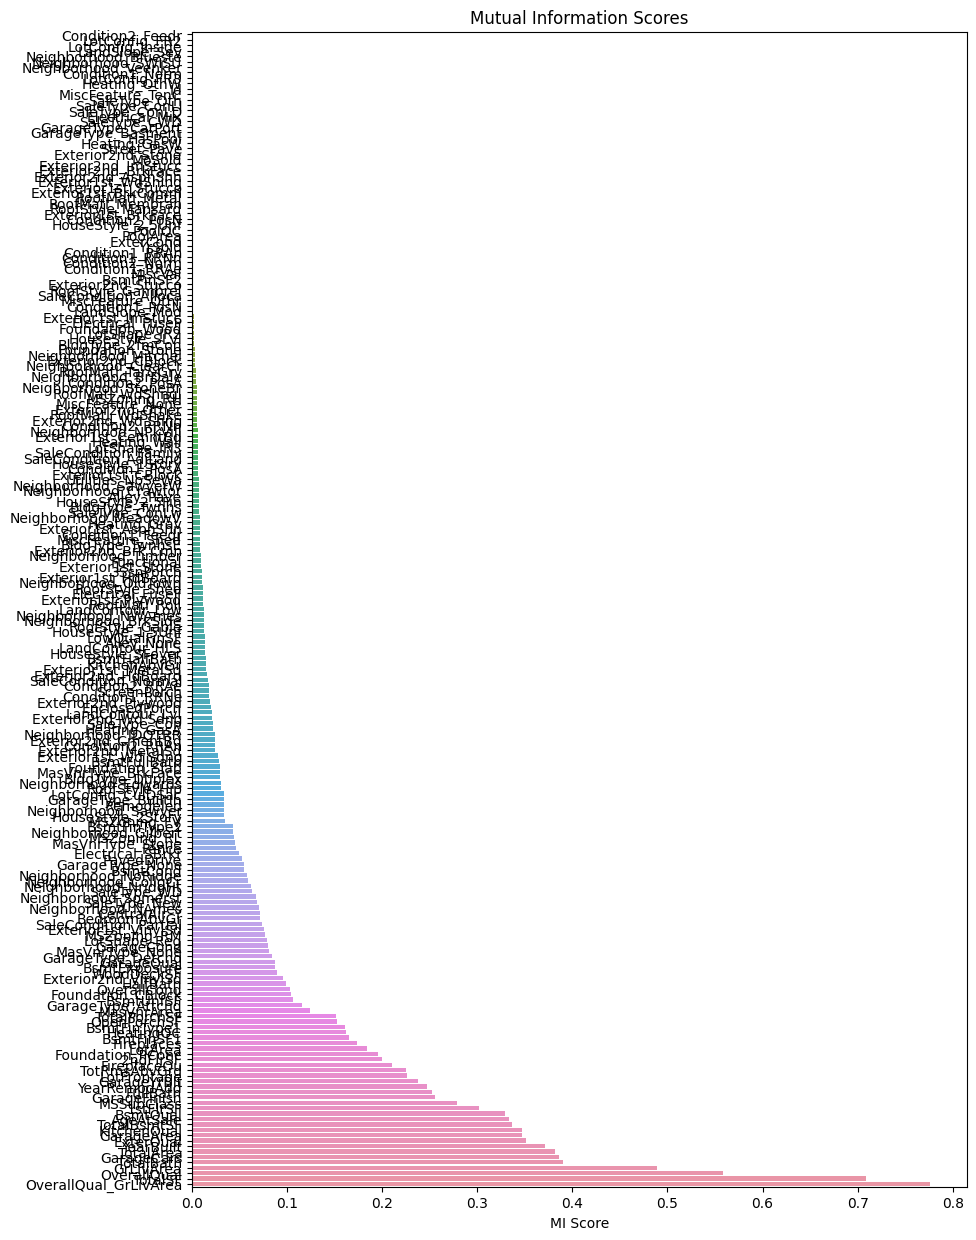

In [23]:

# Sorted MI scores
sorted_mi_scores = mi_scores.sort_values(ascending=True)

# Bar plot of the MI scores
plt.figure(figsize=(10, 15))
sns.barplot(x=sorted_mi_scores, y=sorted_mi_scores.index)
plt.title("Mutual Information Scores")
plt.xlabel("MI Score")
plt.show()

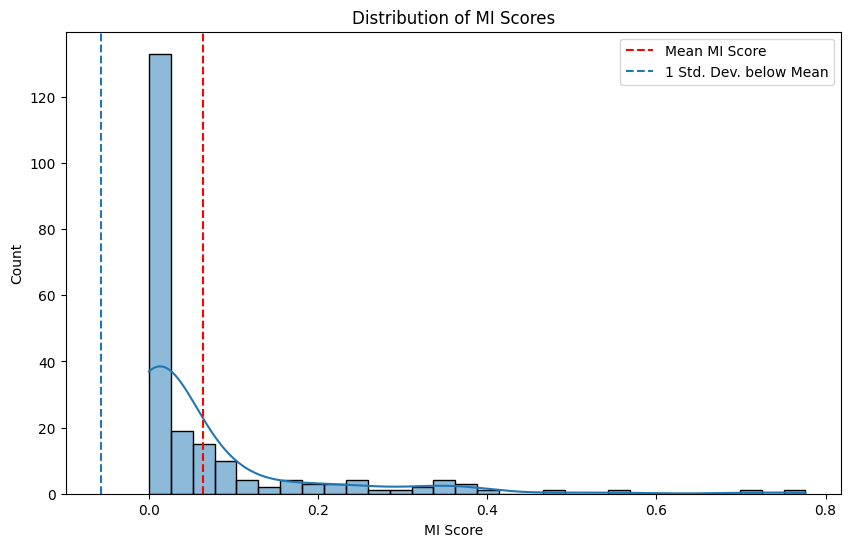

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(mi_scores, bins=30, kde=True)
plt.title("Distribution of MI Scores")
plt.xlabel("MI Score")
plt.ylabel("Count")
plt.axvline(mi_scores.mean(), color="red", linestyle="--", label="Mean MI Score")
plt.axvline(mi_scores.mean() - mi_scores.std(), linestyle="--", label="1 Std. Dev. below Mean")
plt.legend()
plt.show()



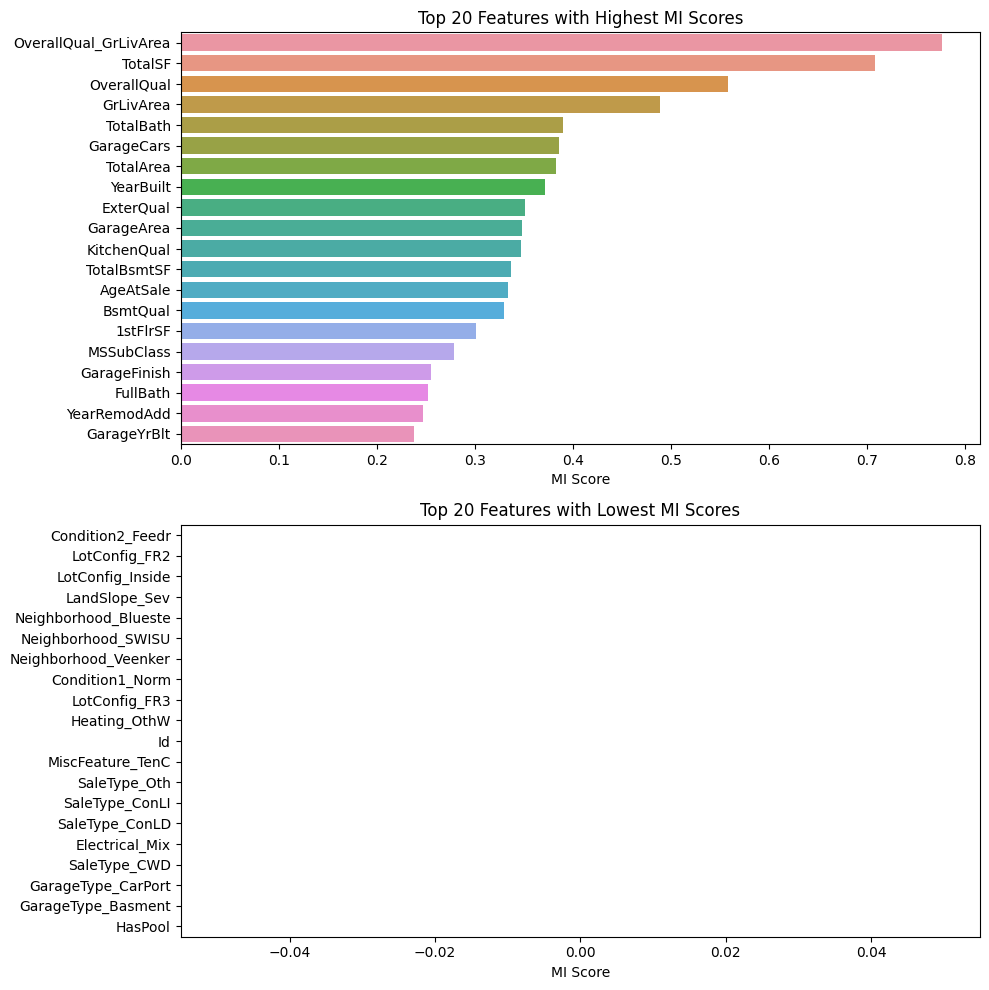

In [26]:
# Define N
N = 20

# Top N MI scores
top_mi_scores = mi_scores.sort_values(ascending=False).head(N)
bottom_mi_scores = mi_scores.sort_values().head(N)

# Plotting
plt.figure(figsize=(10, 10))

# Top N features
plt.subplot(2, 1, 1)
sns.barplot(x=top_mi_scores, y=top_mi_scores.index)
plt.title(f"Top {N} Features with Highest MI Scores")
plt.xlabel("MI Score")

# Bottom N features
plt.subplot(2, 1, 2)
sns.barplot(x=bottom_mi_scores, y=bottom_mi_scores.index)
plt.title(f"Top {N} Features with Lowest MI Scores")
plt.xlabel("MI Score")

plt.tight_layout()
plt.show()


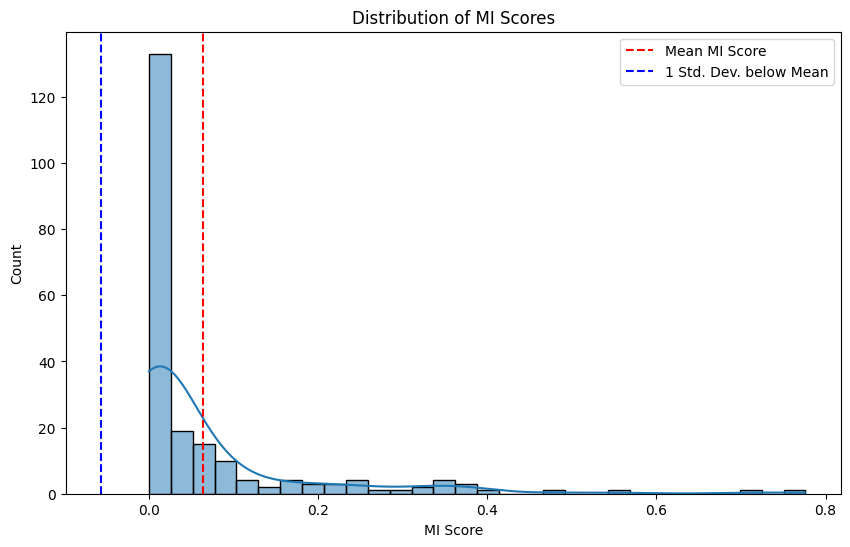

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(mi_scores, bins=30, kde=True)
plt.title("Distribution of MI Scores")
plt.xlabel("MI Score")
plt.ylabel("Count")
plt.axvline(mi_scores.mean(), color="red", linestyle="--", label="Mean MI Score")
plt.axvline(mi_scores.mean() - mi_scores.std(), color="blue", linestyle="--", label="1 Std. Dev. below Mean")
plt.legend()
plt.show()


In [28]:
print(f"Bottom {N} MI scores:")
print(bottom_mi_scores)


Bottom 20 MI scores:
Condition2_Feedr        0.0
LotConfig_FR2           0.0
LotConfig_Inside        0.0
LandSlope_Sev           0.0
Neighborhood_Blueste    0.0
Neighborhood_SWISU      0.0
Neighborhood_Veenker    0.0
Condition1_Norm         0.0
LotConfig_FR3           0.0
Heating_OthW            0.0
Id                      0.0
MiscFeature_TenC        0.0
SaleType_Oth            0.0
SaleType_ConLI          0.0
SaleType_ConLD          0.0
Electrical_Mix          0.0
SaleType_CWD            0.0
GarageType_CarPort      0.0
GarageType_Basment      0.0
HasPool                 0.0
Name: MI Scores, dtype: float64


In [33]:
# Count the number of features with zero MI scores
zero_mi_count = (mi_scores == 0).sum()

print(f"Number of features with MI score of zero: {zero_mi_count}")


Number of features with MI score of zero: 44


In [34]:
# Filter features with MI score of zero
zero_mi_features = mi_scores[mi_scores == 0].index

# Display the features
print("Features with MI score of zero:")
print(zero_mi_features)


Features with MI score of zero:
Index(['HasPool', 'GarageType_Basment', 'GarageType_CarPort', 'SaleType_CWD',
       'Electrical_Mix', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_Oth',
       'MiscFeature_TenC', 'Id', 'Heating_OthW', 'LotConfig_FR3',
       'Condition1_Norm', 'Neighborhood_Veenker', 'Neighborhood_SWISU',
       'Neighborhood_Blueste', 'LandSlope_Sev', 'LotConfig_Inside',
       'LotConfig_FR2', 'Heating_GasW', 'Street_Pave', 'YrSold', 'MoSold',
       'PoolQC', 'PoolArea', 'ExterCond', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_Norm', 'Condition2_PosN',
       'HouseStyle_2.5Unf', 'RoofStyle_Mansard', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_ImStucc', 'Exterior2nd_Stone',
       'Condition2_Feedr'],
      dtype='object')


In [22]:
# remove the low scoring features from the dataset.
# We can select features to drop based on a threshold (e.g. MI < 0.01) and use drop:

# Define the threshold for feature removal
threshold = 0.01

# Get the low-scoring features
low_scoring_features = mi_scores[mi_scores < threshold].index.tolist()

# Remove the low-scoring features from the dataset
train_data_encoded = train_data_encoded.drop(low_scoring_features, axis=1)

# Print the removed features
print("Removed features:")
print(low_scoring_features)

Removed features:
['Exterior1st_Stone', 'Functional', 'Neighborhood_Timber', 'Exterior2nd_Brk Cmn', 'BldgType_TwnhsE', 'MiscFeature_Shed', 'Condition1_Feedr', 'Exterior1st_AsphShn', 'Heating_Grav', 'Neighborhood_MeadowV', 'SaleType_ConLw', 'BldgType_Twnhs', 'HouseStyle_2.5Fin', 'Alley_Pave', 'Neighborhood_Crawfor', 'Neighborhood_SawyerW', 'Utilities_NoSeWa', 'Exterior1st_CBlock', 'Condition1_PosA', 'HouseStyle_1Story', 'SaleCondition_AdjLand', 'SaleCondition_Family', 'LotShape_IR3', 'Heating_Wall', 'Exterior1st_CemntBd', 'Neighborhood_NPkVill', 'Condition2_RRNn', 'Exterior2nd_Wd Shng', 'RoofMatl_WdShake', 'Exterior2nd_Other', 'MiscFeature_None', 'MSZoning_RH', 'RoofMatl_WdShngl', 'Neighborhood_StoneBr', 'Condition2_PosA', 'Neighborhood_BrDale', 'RoofMatl_Tar&Grv', 'Neighborhood_ClearCr', 'Exterior2nd_CBlock', 'Neighborhood_Mitchel', 'Foundation_Stone', 'BldgType_2fmCon', 'HouseStyle_SLvl', 'LotShape_IR2', 'Foundation_Wood', 'Electrical_FuseP', 'Exterior1st_ImStucc', 'LandSlope_Mod', 'C

## Normalize Numerical Variables


In the context of our Ames Housing dataset, with its high-dimensional input space and our new features, some preprocessing steps such as feature scaling become essential. The dataset contains a mix of numerical features, each with varying scales. Algorithms that rely on distances or gradients, such as Linear Regression, Support Vector Machines, or those with regularization, can be heavily influenced by the magnitude of features. By ensuring that all features operate on a consistent scale, we eliminate any undue influence a larger scale feature might exert, thereby ensuring a balanced and fair contribution from all features during the modeling process. Furthermore, when it comes to optimization techniques like gradient descent, scaling aids in achieving faster and more stable convergence. As our objective includes experimenting with multiple regression algorithms and neural networks, and given the necessity of feature extraction highlighted in the brief, scaling acts as a foundational step. Not only does it improve the performance and stability of many algorithms, but it also aligns with best practices, ensuring that our models' results are both reliable and interpretable.

### Why do we exclude the target variable from scaling?

When we scale features, our objective is to ensure that the predictors have a consistent influence on the model, preventing any one feature from exerting undue influence solely due to its scale. However, the target variable, 'SalePrice' in our dataset, is what we're trying to predict, and its scale is inherently meaningful. By altering its scale, we risk losing the direct interpretability of our model's predictions.

tl:dr - Keeping 'SalePrice' in its original scale ensures that our model predictions are immediately relevant and interpretable, aligning with the objective of building a model that provides direct insights into house prices.

In [14]:
from sklearn.preprocessing import StandardScaler

# Separating the target variable
y_train = train_data_encoded['SalePrice']
train_data_encoded.drop('SalePrice', axis=1, inplace=True)

# Scaling only the common features between training and test datasets
common_features = train_data_encoded.columns.intersection(test_data_encoded.columns)

# Scaling the numerical variables for common features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_encoded[common_features])
test_data_scaled = scaler.transform(test_data_encoded[common_features])

# Checking the first few rows to ensure scaling has been applied
pd.DataFrame(train_data_scaled, columns=common_features).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleCondition_Normal,SaleCondition_Partial,TotalArea,TotalSF,AgeAtSale,TotalBath,TotalPorchSF,HasPool,Remodeled,OverallQual_GrLivArea
0,-5.735281,0.425401,-0.076972,-0.119598,0.694385,-0.460159,1.045693,0.879312,1.211932,1.060664,...,0.466838,-0.304107,0.852589,1.088777,-1.038232,1.800266,-0.484753,-0.064393,-0.953588,0.707110
1,-5.320172,-1.124498,0.561642,0.139916,0.031855,1.944960,0.164918,-0.422181,-0.804570,-0.688649,...,0.466838,-0.304107,-0.282874,-0.693617,-0.191033,0.202444,-0.067214,-0.064393,-0.953588,-0.123500
2,-5.025647,0.425401,0.061643,0.462502,0.694385,-0.460159,0.980858,0.831422,1.139621,1.060664,...,0.466838,-0.304107,0.813204,1.135900,-0.973493,1.800266,-0.581868,-0.064393,1.048671,0.754473
3,-4.797195,0.646045,-0.322636,0.129296,0.694385,-0.460159,-1.870098,-0.713815,-0.804570,-0.688649,...,-2.142069,-0.304107,0.707101,1.049929,1.808693,0.066689,0.859671,-0.064393,1.048671,0.711560
4,-4.610537,0.425401,0.711952,0.944727,1.278778,-0.460159,0.948417,0.735570,1.432385,1.060664,...,0.466838,-0.304107,1.795895,1.324551,-0.941099,1.800266,0.995643,-0.064393,-0.953588,1.455616


In [15]:
# Saving the scaled training data
pd.DataFrame(train_data_scaled, columns=common_features).to_csv("../data_details/train_data_scaled.csv", index=False)

# Saving the scaled test data
pd.DataFrame(test_data_scaled, columns=common_features).to_csv("../data_details/test_data_scaled.csv", index=False)

# Saving the target variable
y_train.to_csv("../data_details/y_train.csv", index=False)
